# Cardio Good Fitness

## Objective:
Preliminary Data analysis by exploring the dataset and practice extracting basic observations about the data. The idea is to get you comfortable working in python. The 3 general objectives are:

1. Come up with a customer profile (characteristics of a customer) of the different products.
2. Perform univariate and multivariate analysis.
3. Generate a set of insights and recommendations that will help the company in targeting new customers.

## Context:
The data is about customers of the treadmill products of a retail store called Cardio Good Fitness. It contains the following variables - 

1. Product - model no. of the treadmill
2. Age - age of the customers in years
3. Gender - gender of the customers
4. Education - education of the customer in no. of years
5. Marital Status - marital status of the customer
6. Usage - avg. no. times the customer wants to use the treadmill every week.
7. Fitness - self rated fitness score of the customer(5 - very fit, 1 - very unfit)
8. Income - income of the customer
9. Miles - miles that a customer expects to run

In [404]:
#First step is to load all the necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

In [405]:
#Next is to load the csv file into a dataframe using pandas functionality

cardio_data = pd.read_csv("CardioGoodFitness.csv")

cardio_data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [406]:
#Grabs the various unique Products

cardio_data["Product"].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

There is 3 different products within the given csv file:

1. TM195
2. TM498
3. TM798

The best way to go about providing a thorough analysis on the stores customers is to first apply exploratory data analysis (EDA) on each product then compare them against each other.

# Product Indexing

Let's change the dataframe to have the products as their indexing

In [407]:
indexed_data = cardio_data.set_index("Product")

indexed_data

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,,,,,,,,
TM195,18,Male,14,Single,3,4,29562,112
TM195,19,Male,15,Single,2,3,31836,75
TM195,19,Female,14,Partnered,4,3,30699,66
TM195,19,Male,12,Single,3,3,32973,85
TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...
TM798,40,Male,21,Single,6,5,83416,200
TM798,42,Male,18,Single,5,4,89641,200
TM798,45,Male,16,Single,5,5,90886,160


# Product TM195

Let's start analyzing the data for the TM195 Product

In [408]:
data_195 = indexed_data.loc["TM195"]

data_195.reset_index()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,TM195,43,Male,16,Partnered,3,3,53439,66
76,TM195,44,Female,16,Single,3,4,57987,75
77,TM195,46,Female,16,Partnered,3,2,60261,47
78,TM195,47,Male,16,Partnered,4,3,56850,94


In [409]:
# Checks if there are any null values 
data_195.isnull().sum()

Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Heatmap for Correlation against all Numerical Variables

<AxesSubplot:>

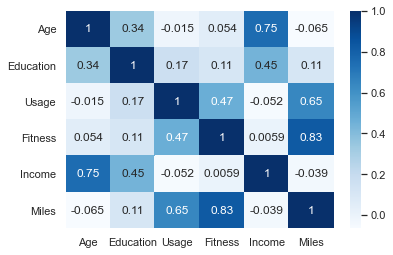

In [410]:
sns.heatmap(data_195.corr(), annot = True, cmap = "Blues")

This heatmap gives a good basis to which data sets we can measure against each other.

## Boxplots across Genders

<AxesSubplot:xlabel='Gender', ylabel='Age'>

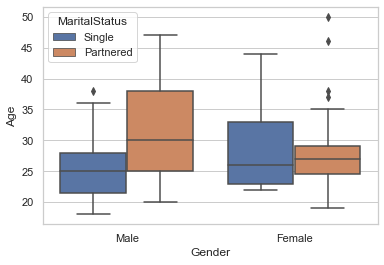

In [411]:
sns.set_theme(style = "whitegrid")

sns.boxplot(x = data_195["Gender"], y = data_195["Age"], hue = data_195["MaritalStatus"])

This plot shows that the 5 number summary for the TM195 users are stronger for Partnered people. Meaning the median number of users between both genders is higher for non-single people. It can also be seen that there are a couple of outliers for female partnered consumers. There is one outlier for Single male consumers. It's also important to note that it's comparing a categoircal variable to a numerical one.

<AxesSubplot:xlabel='Gender', ylabel='Income'>

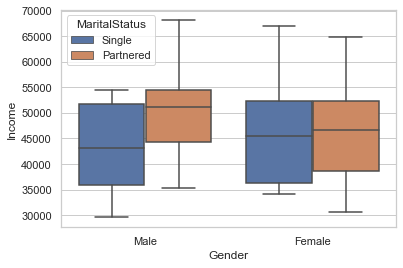

In [412]:
sns.boxplot(x = "Gender", y = "Income", hue = "MaritalStatus", data = data_195)

Between the users of the TM195, Partnered users have a higher Income on average through both genders. This may be due to the combined income of their spouse/partner, which makes sense as to why the median is greater for men by a significant margin while female median is a bit higher compared to the single females. It's also important to note that it's comparing a categoircal variable to a numerical one.

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

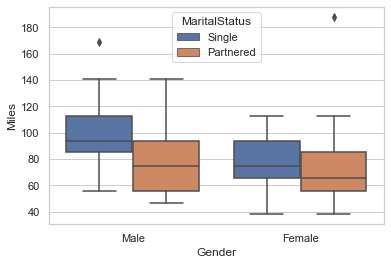

In [413]:
sns.boxplot(x = "Gender", y = "Miles", hue = "MaritalStatus", data = data_195)

This plot shows the distribution of miles ridden by both male and females with a comparison to the Marital Status of the consumers. The plot shows that for both Male and Female, Single consumers ride more miles on their machines compared to Partnered consumers. This may be explained by the need to become fit or lose weight for Single people for social pressures of dating. This can also be explained as to why partnered consumers being lower on their miles as they don't require as a tenatious schedule due to their ready relationship. So single people tend to right further for the need to be acquirable and fit while partnered consumers are maybe doing it for the sake of being healthy. It's also important to note that it's comparing a categoircal variable to a numerical one.

## Countplots (A form of Univariate Analysis)

<AxesSubplot:xlabel='Fitness', ylabel='count'>

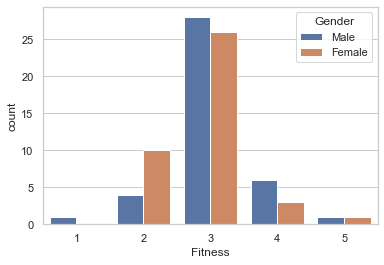

In [414]:
sns.countplot(x = data_195["Fitness"], hue = data_195["Gender"])

This plot gives a good idea to which fitness level the bulk of the consumers of the TM195 product are. It seems that a majority of the users for both male and female users are at fitness level 3, which is the average level fitness from 1 to 5. This can be a valid reason to say that the TM195 should be marketed towards the average consumer in terms of fitness. 

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

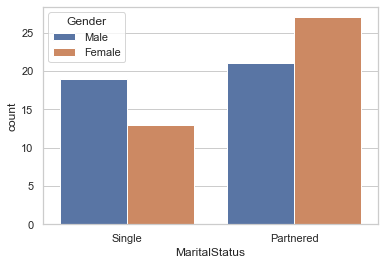

In [415]:
sns.countplot(x = "MaritalStatus", hue = "Gender", data = data_195)

This is indicative that more consumers are partnered across both genders. This helps with building a customer profile. 

<AxesSubplot:xlabel='Usage', ylabel='count'>

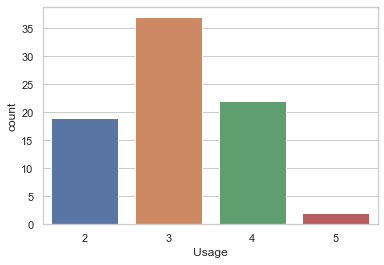

In [416]:
sns.countplot(x = "Usage", data = data_195)

This shows that the most frequent usage rating amongst all the consumers of the TM195 is a rating of 3, which means that most consumers feel they use the product at a moderate or average rating level.

<AxesSubplot:xlabel='Education', ylabel='count'>

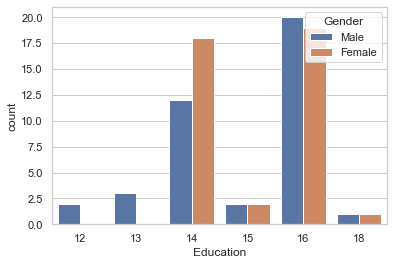

In [417]:
sns.countplot(x = "Education", hue = "Gender", data = data_195)

It shows that the highest frequency of consumers are usually with an education level of 14 and 16 years. 

## Pointplots

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

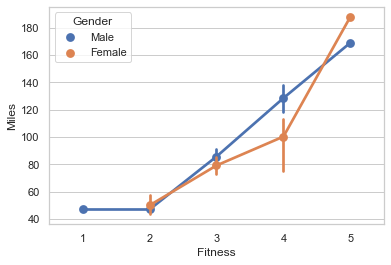

In [418]:
sns.pointplot(x = "Fitness", y = "Miles", hue = "Gender", data = data_195)

Pointplots are great for plotting analysis of categorical variables. The categorical variable in this case is the "Fitness" variable. Though fitness is rated with a numerical value, it's only rated with a handfull of various numbers, thus can be used as a categorical value. This plot shows that most consumers with higher fitness levels usually render a higher count on their miles across both genders. This makes sense as you'd expect more fit people to be able to log in more miles.

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

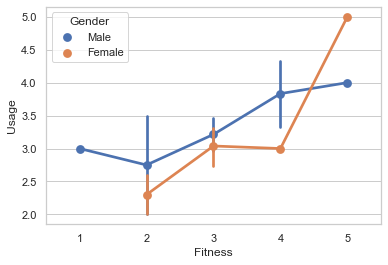

In [419]:
sns.pointplot(y = "Usage", x = "Fitness", hue = "Gender", data = data_195)

This is kind of synonomous with the previous graph as it shows that people with higher fitness levels believe that they use the product more. This plot shows 2 categorical variables being processed against each other.

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

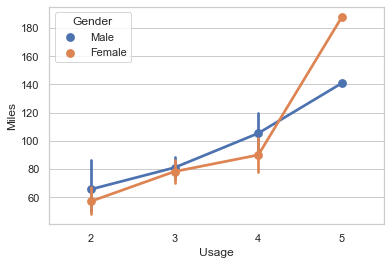

In [420]:
sns.pointplot(x = "Usage", y = "Miles", hue = "Gender", data = data_195)

Again, this is kind of expected from the previous 2 graphs that shows that those who believe they use the product more have also logged in more miles.

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

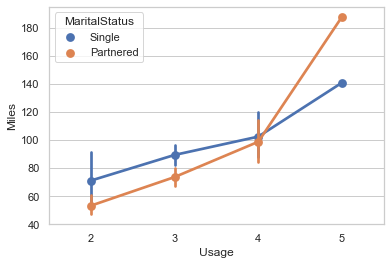

In [421]:
sns.pointplot(x = "Usage", y = "Miles", hue = "MaritalStatus", data = data_195)

This graph shows that on average for most usage ratings, single people log in more miles. The Usage = 5 points for MaritalStatus is kind of impercise to the rest of the graph as it seems there's only one point for each.

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

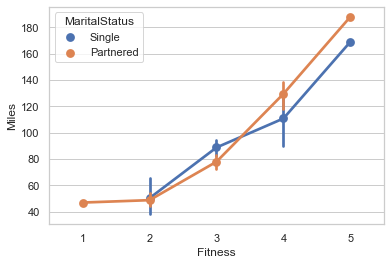

In [422]:
sns.pointplot(x = data_195.Fitness, y = data_195.Miles, hue = data_195.MaritalStatus)

This is similar to the graph earlier in this section, only it measures the trend based on marital status. This shows that amongst both statuses, the trend is very similar.

<AxesSubplot:xlabel='Usage', ylabel='Age'>

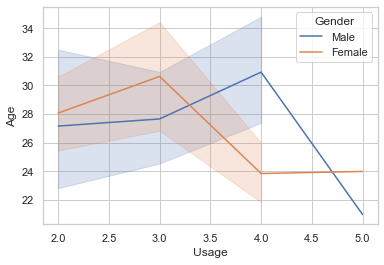

In [423]:
sns.lineplot(x = "Usage", y = "Age", hue = "Gender", data = data_195)

This lineplot shows how usage varies with age. Though the correlation isn't strong, the trend for both male and female has some similitude.

## Scatterplots

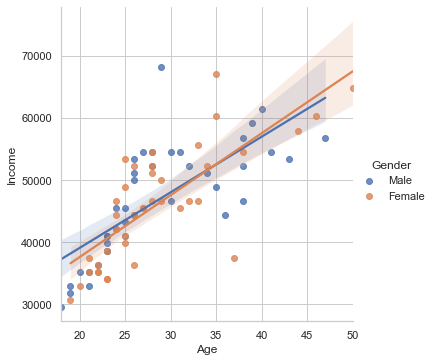

In [424]:
sns.lmplot(x = "Age", y = "Income", hue = "Gender", data = data_195)

This scatterplot shows a strong correlation between age and Income amongst both genders. This is pretty common amongst any case study as data has shown as you get older and get more experience you get paid more.

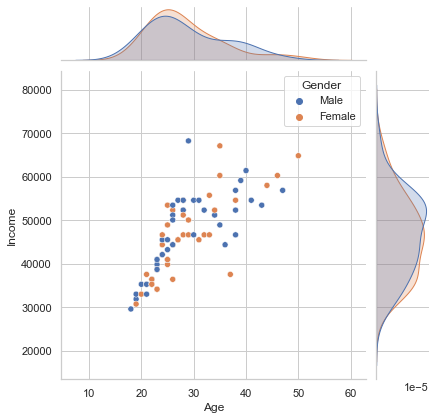

In [425]:
sns.jointplot(x = "Age", y = "Income", hue = "Gender", data = data_195)

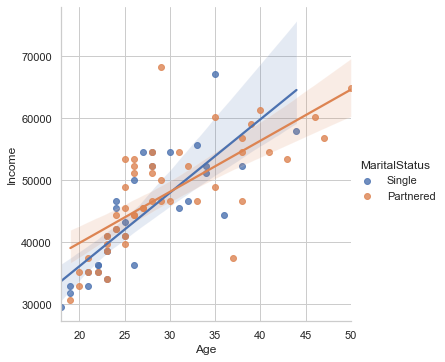

In [426]:
sns.lmplot(x = "Age", y = "Income", hue = "MaritalStatus", data = data_195)

This plot shows the same thing only with the hue being the marital status.

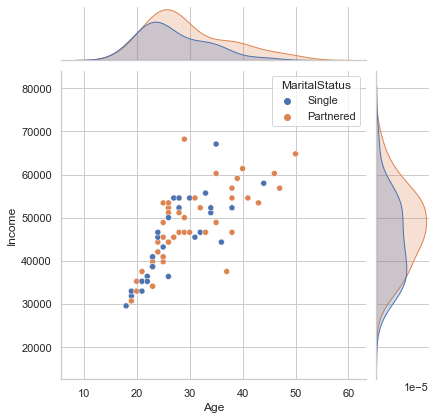

In [427]:
sns.jointplot(x = "Age", y = "Income", hue = "MaritalStatus", data = data_195)

## Categorical vs. Numerical Bivariate Analysis

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

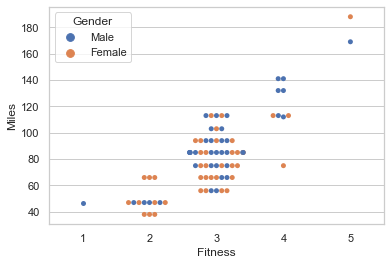

In [428]:
sns.swarmplot(x = "Fitness", y = "Miles", data = data_195, hue = "Gender")

Swarm plots help to conduct bivariate analysis consisting of a Categorical Variable. In this case, we can see the a majority of the point are centered around a fitness level of 3. The value of miles is heavily distrubted around less than 60 to less than 120 for fitness level of 3. 

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

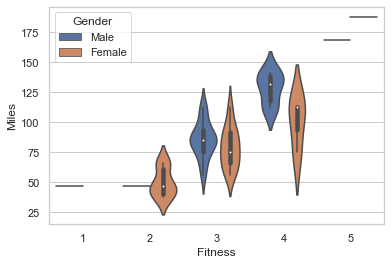

In [429]:
sns.violinplot(x = "Fitness", y = "Miles", data = data_195, hue = "Gender")

This violin plot shows the distrubiton of the previous graph with a KDE curve. 

## Distribution Plot of All Variables

<AxesSubplot:xlabel='Age', ylabel='Density'>

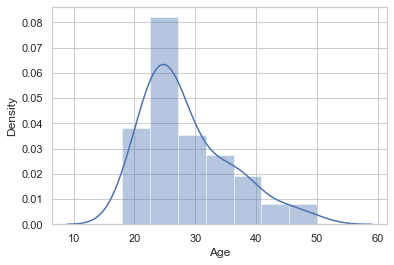

In [430]:
sns.distplot(data_195["Age"])

In [431]:
grouped_195_MS = data_195.groupby("MaritalStatus")

print(grouped_195_MS["Age"].mean())

print(data_195["Age"].mean())
print(data_195["Age"].median())
print(data_195["Age"].mode())

MaritalStatus
Partnered    29.666667
Single       26.875000
Name: Age, dtype: float64
28.55
26.0
0    23
dtype: int64


These distribution plots is a critical tool in providing a univariate analysis for all variables in the csv file. This analysis shows the distribution of the ages in the TM195 product set. The shape show a positive skewed distribution with a slight right tail. The data shows that the average age for the consumer was 28 years old while the most common age amongst consumers was 26. This shows that the average age for partnered consumers is 30 while the single consumers is 27.

<AxesSubplot:xlabel='Education', ylabel='Density'>

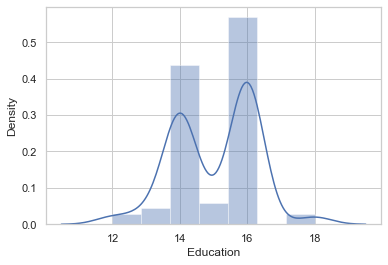

In [432]:
sns.distplot(data_195["Education"])

<AxesSubplot:xlabel='Income', ylabel='Density'>

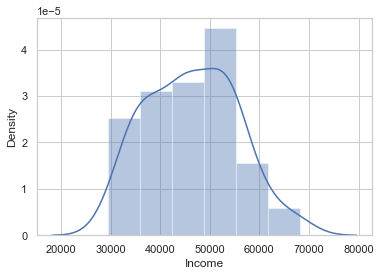

In [433]:
sns.distplot(data_195.Income)

In [434]:
print(data_195["Income"].mean())
print(data_195["Income"].median())

46418.025
46617.0


This plot shows the distribution of the incomes amongst the product users of TM195. The average income is 46,418 dollars while the Median is 46,617. By defintion, the plot is considered a Left skewed graph as the mean is less than the median. 

<AxesSubplot:xlabel='Miles', ylabel='Density'>

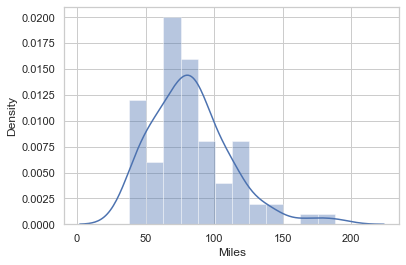

In [435]:
sns.distplot(data_195.Miles)

In [436]:
print(data_195.Miles.mean())
print(data_195.Miles.median())

82.7875
85.0


The average miles ridden on the TM195 was 82.7875 while the median was 85.

## Barplots and Categorical Bivariate Analysis

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

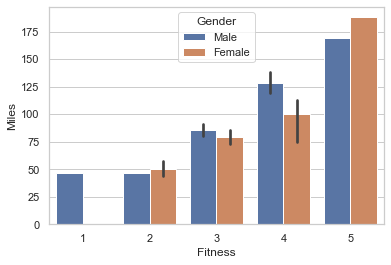

In [437]:
sns.barplot(x = "Fitness", y = "Miles", hue = "Gender", data = data_195)

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

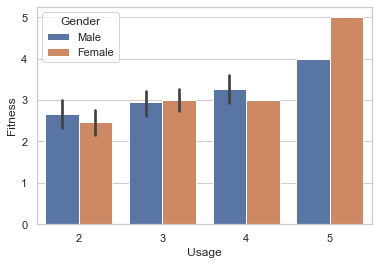

In [438]:
sns.barplot(x = "Usage", y = "Fitness", hue = "Gender", data = data_195)

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

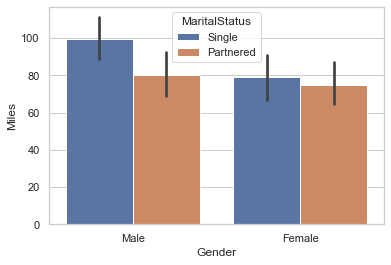

In [439]:
sns.barplot(x = "Gender", y = "Miles", hue = "MaritalStatus", data = data_195)

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

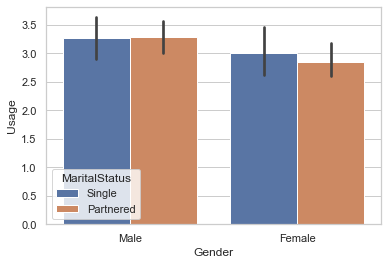

In [440]:
sns.barplot(x = "Gender", y = "Usage", hue = "MaritalStatus", data = data_195)

The previous plots are indicative of analysees conducted before. This plot shows that the usage is a bit higher amongst male. 

## Summary

Based on the analysis of the data for the TM195 product, it can be possible to generate a customer profile that the company should target to sell their product to and thus maximize profits with the least amount of effort. Based on the boxplots across genders, the company should try and sell their product to Partnered customers, specifically Male partnered consumers. It should also be marketed as a product for people who are moderately active and people who make between 40,000 and 50,000 anually. When it comes to the usage, it seems that product could become a bit more appealing to consumers who are single as single consumers use the product more. If there is some method to make the product more appealing to single people, for example by making it more affordable, it could attract a bit more of that market. It's also important to note that amongst partnered consumers, the age seems to be higher. Though the average age is 28 year old amongst all consumers, the average age for partnered consumers is 30 while the average age for single consumers is 27. So ideally the company should try and market the product for people in their late twenties to capture a larger consumer chunk.


# Product TM498

This portion is the analysis of the TM498 Product

In [441]:
data_498 = indexed_data.loc["TM498"]

data_498.reset_index()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM498,19,Male,14,Single,3,3,31836,64
1,TM498,20,Male,14,Single,2,3,32973,53
2,TM498,20,Female,14,Partnered,3,3,34110,106
3,TM498,20,Male,14,Single,3,3,38658,95
4,TM498,21,Female,14,Partnered,5,4,34110,212
5,TM498,21,Male,16,Partnered,2,2,34110,42
6,TM498,21,Male,12,Partnered,2,2,32973,53
7,TM498,23,Male,14,Partnered,3,3,36384,95
8,TM498,23,Male,14,Partnered,3,3,38658,85
9,TM498,23,Female,16,Single,3,3,45480,95


In [442]:
# Checks for Null values
data_498.isnull().sum()

Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Heatmap for Correlation 

<AxesSubplot:>

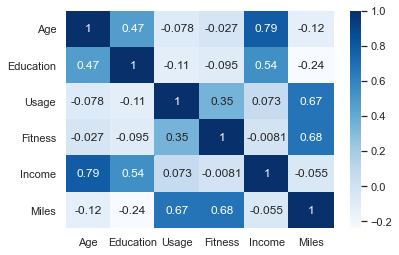

In [443]:
sns.heatmap(data_498.corr(), annot = True, cmap = "Blues")

## Boxplots

<AxesSubplot:xlabel='Gender', ylabel='Age'>

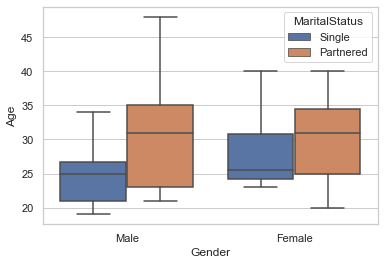

In [444]:
sns.boxplot(x = "Gender", y = "Age", hue = "MaritalStatus", data = data_498)

This plot shows that the average age for consumers of the TM498 is higher amongst partnered consumers. Much higher compared to the TM195 product. 

<AxesSubplot:xlabel='Gender', ylabel='Income'>

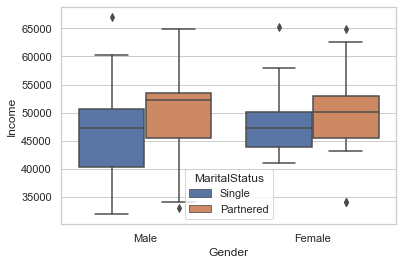

In [445]:
sns.boxplot(x = "Gender", y = "Income", data = data_498, hue = "MaritalStatus")

The median income for partnered consumers is higher for both male and female. Interestingly, the median income is higher on all fronts compared to the consumers of the TM195 product. There are a few outliers in this data set.

## Distribution Plot

<AxesSubplot:xlabel='Age', ylabel='Density'>

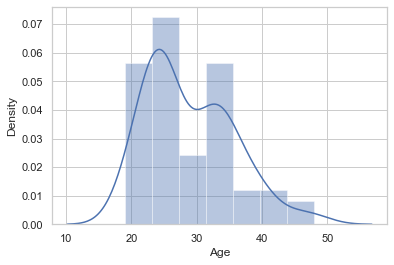

In [446]:
sns.distplot(data_498["Age"])

In [447]:
group498 = data_498.groupby("MaritalStatus")

print(group498.mean())

print(data_498["Age"].mean())
print(data_498["Age"].median())

                     Age  Education     Usage   Fitness        Income  \
MaritalStatus                                                           
Partnered      30.222222  15.250000  3.055556  2.916667  49522.666667   
Single         26.916667  14.916667  3.083333  2.875000  48150.125000   

                   Miles  
MaritalStatus             
Partnered      90.055556  
Single         84.750000  
28.9
26.0


The average age of the TM498 consumers is 28.9 while the median age is 26. This is indicative of a right skewed distribution plot. This is similar to the consumer age profile of the TM195 product. The average age for partnered consumers is 30 while the average age of consumers that are single is 27. So that shows there are more frequent 26 year olds in this data set. 

<AxesSubplot:xlabel='Income', ylabel='Density'>

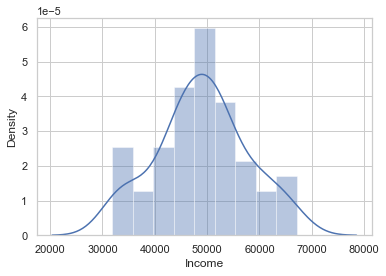

In [448]:
sns.distplot(data_498["Income"])

In [449]:
print(data_498["Income"].mean())
print(data_498["Income"].median())

48973.65
49459.5


The average income is 48973 dollars while the median income was 49459. Technically, the it's left skewed but the shape overall looks like a uniform distribution.

<AxesSubplot:xlabel='Miles', ylabel='Density'>

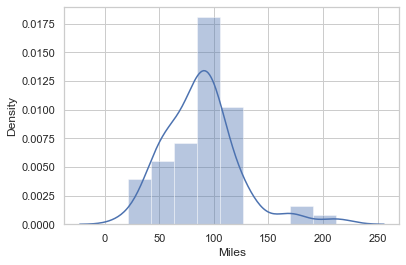

In [450]:
sns.distplot(data_498["Miles"])

In [451]:
print(data_498["Miles"].mean())
print(data_498["Miles"].median())

87.93333333333334
85.0


The shape for the miles distribution is right skewed. The average miles was 88 and the median is 85. 

## Point Plots

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

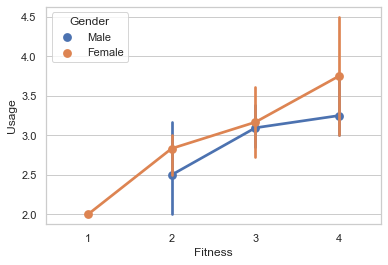

In [452]:
sns.pointplot(x = "Fitness", y = "Usage", data = data_498, hue = "Gender")

This plot shows that more fit people have a higher usage. What is interesting is that females have a higher average on the usage for each fitness level. 

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

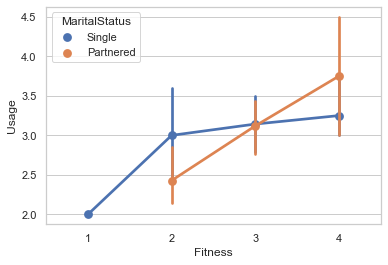

In [453]:
sns.pointplot(x = "Fitness", y = "Usage", data = data_498, hue = "MaritalStatus")

This shows that usage amongst marital status is higher for certain fitness levels. At the highest fitness level, usage is higher for partnered consumers.

## Count Plots

<AxesSubplot:xlabel='Fitness', ylabel='count'>

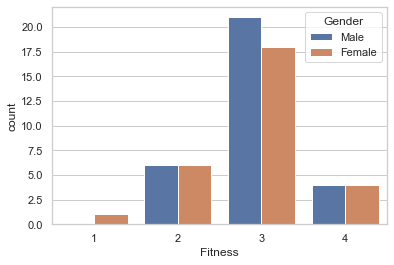

In [454]:
sns.countplot(x = "Fitness", hue = "Gender", data = data_498)

This shows that the highest count for fitness levels is 3 for both men and women. 

<AxesSubplot:xlabel='Fitness', ylabel='count'>

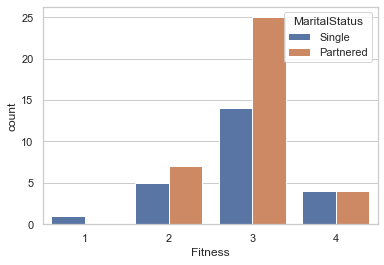

In [455]:
sns.countplot(x = "Fitness", hue = "MaritalStatus", data = data_498)

It seems it more frequent to have partnered consumers amongst all fitness level. It's much higher for the common fitness level 3.

<AxesSubplot:xlabel='Education', ylabel='count'>

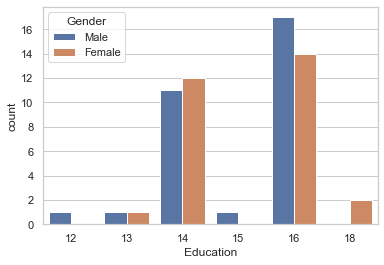

In [456]:
sns.countplot(x = "Education", hue = "Gender", data = data_498)

Just like TM195, the education level of highest frequency is 14 and 16.

<AxesSubplot:xlabel='Usage', ylabel='count'>

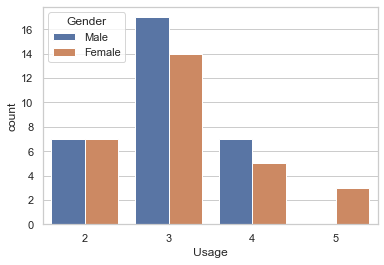

In [457]:
sns.countplot(x = "Usage", hue = "Gender", data = data_498)

Usage has the highest frequency at level 3 but it also has some points at 5.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

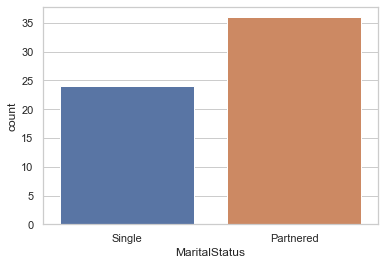

In [458]:
sns.countplot(x = "MaritalStatus", data = data_498)

Partnered data points are much higher than single data points in frequency.

<AxesSubplot:xlabel='Gender', ylabel='count'>

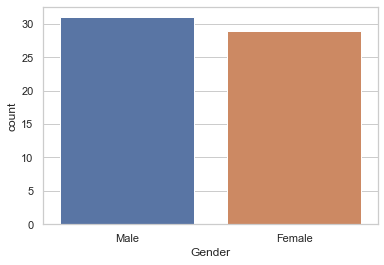

In [459]:
sns.countplot(x = "Gender", data = data_498)

Males are slightly bit higher. 

## Correlation Plots

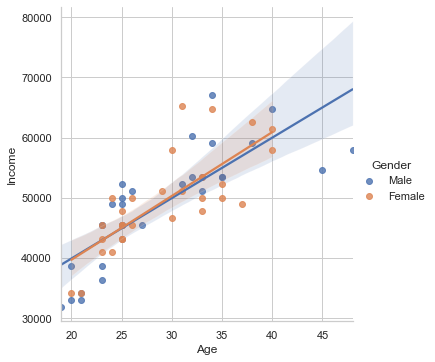

In [460]:
sns.lmplot(x = "Age", y = "Income", data = data_498, hue = "Gender")

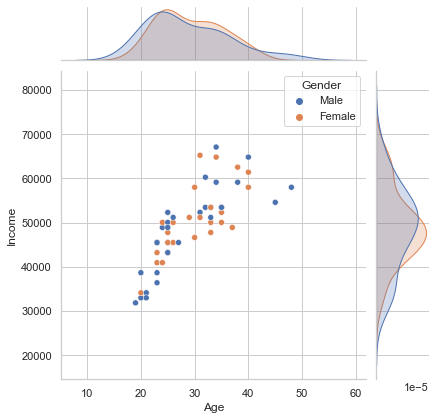

In [461]:
sns.jointplot(x = "Age", y = "Income", data = data_498, hue = "Gender")

Income increase with age as stated before.

## Categorical vs Numerical Analysis

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

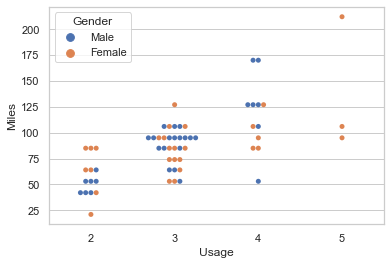

In [462]:
sns.swarmplot(x = "Usage", y = "Miles", data = data_498, hue = "Gender")

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

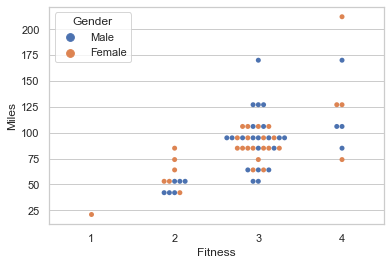

In [463]:
sns.swarmplot(x = "Fitness", y = "Miles", data = data_498, hue = "Gender")

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

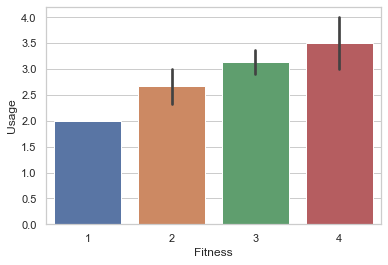

In [464]:
sns.barplot(x = "Fitness", y = "Usage", data = data_498)

The graphs mentioned on top are indicative of a conclusing reached in the TM195 analysis as Usage and Fitness go hand in hand as well as Miles

<AxesSubplot:xlabel='Usage', ylabel='Age'>

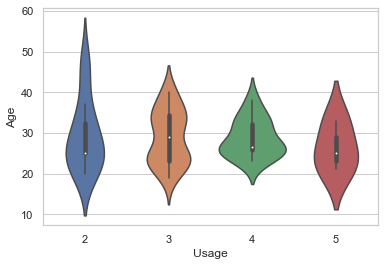

In [465]:
sns.violinplot(x = "Usage", y = "Age", data = data_498)

This violin plot shows that usage is slightly related to age as higher usage has lower ages.

<AxesSubplot:xlabel='Usage', ylabel='Age'>

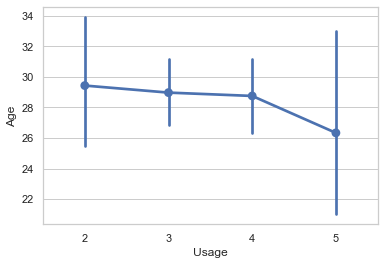

In [466]:
sns.pointplot(x = "Usage", y = "Age", data = data_498)

Correlated to the Statement above.

## Summary

This product summary is somewhat similar to the TM195. The main differences is that while male and female for the TM195 distribution/count was the same, the usage for Females was a bit higher compared to the TM195. In terms of who they should priotize for selling, the biggest difference is that this product seems to be of a higher cost compared to the TM195. They should advertise this as a pricier solution but it should also be noted that it should be more leniated to women.

# Product TM798 

In [467]:
data_798 = indexed_data.loc["TM798"]

data_798.reset_index()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM798,22,Male,14,Single,4,3,48658,106
1,TM798,22,Male,16,Single,3,5,54781,120
2,TM798,22,Male,18,Single,4,5,48556,200
3,TM798,23,Male,16,Single,4,5,58516,140
4,TM798,23,Female,18,Single,5,4,53536,100
5,TM798,23,Male,16,Single,4,5,48556,100
6,TM798,24,Male,16,Single,4,5,61006,100
7,TM798,24,Male,18,Partnered,4,5,57271,80
8,TM798,24,Female,16,Single,5,5,52291,200
9,TM798,24,Male,16,Single,5,5,49801,160


In [468]:
# Checks for null values
data_798.isnull().sum()

Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Heatmap for Correlation against all Numerical Variables

<AxesSubplot:>

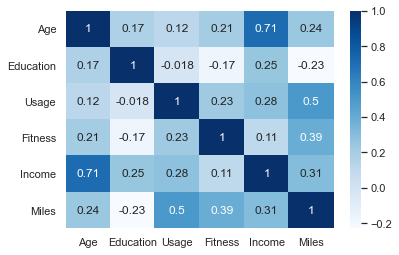

In [469]:
sns.heatmap(data_798.corr(), cmap = "Blues", annot = True)

## Boxplots

<AxesSubplot:xlabel='Gender', ylabel='Age'>

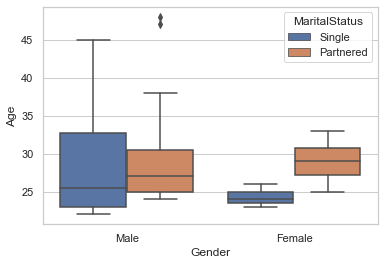

In [470]:
sns.boxplot(x = "Gender", y = "Age", data = data_798, hue = "MaritalStatus")

There is few data points for Female who are single, but there are some outliers 

<AxesSubplot:xlabel='Gender', ylabel='Income'>

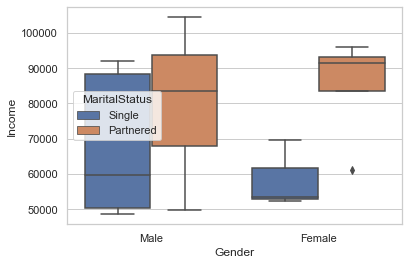

In [471]:
sns.boxplot(x = "Gender", y = "Income", data = data_798, hue = "MaritalStatus")

There seems to be a large numebr of data points for single male. The income is much higher for Partnered Femlas as well as Partnered Males.

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

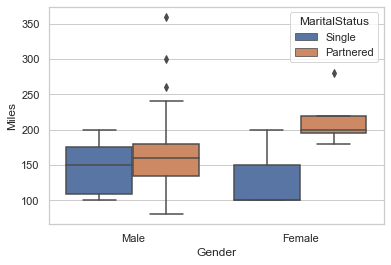

In [472]:
sns.boxplot(x = "Gender", y = "Miles", data = data_798, hue = "MaritalStatus")

This plot shows that the highest miles ridden is the Partnered Female group. But it also could be flawed because there is a small amount of points for females. Also there are outliers for Partnered Males. 

## Countplots

<AxesSubplot:xlabel='Fitness', ylabel='count'>

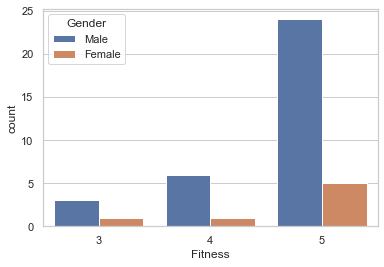

In [473]:
sns.countplot(x = "Fitness", data = data_798, hue = "Gender")

Based on this plot, it already shows that TM798 is a different as it seems to be marketed towards high fitness people.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

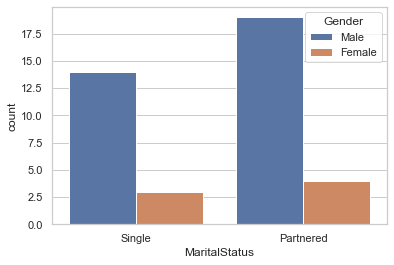

In [474]:
sns.countplot(x = "MaritalStatus", hue = "Gender", data = data_798)

This seem to be highly bought by partnered test points, just like the rest of the products.

<AxesSubplot:xlabel='Usage', ylabel='count'>

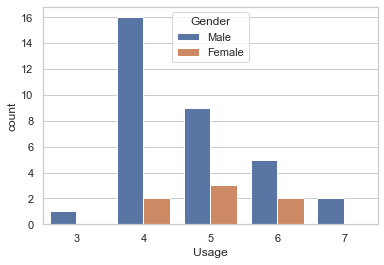

In [475]:
sns.countplot(x = "Usage", hue = "Gender", data = data_798)

From this plot, it can be said that this product is used more by people who are more into fitness based on the usage.

<AxesSubplot:xlabel='Education', ylabel='count'>

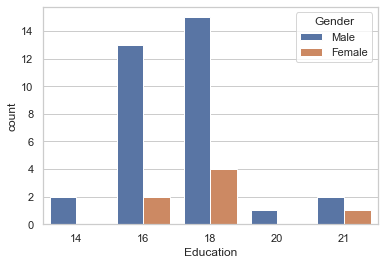

In [476]:
sns.countplot(x = "Education", hue = "Gender", data = data_798)

This shows that education frequency is higher for 16 and 18 years of education.

## Pointplots

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

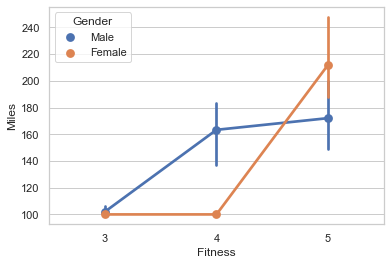

In [477]:
sns.pointplot(x = "Fitness", y = "Miles", data = data_798, hue = "Gender")

<AxesSubplot:xlabel='Fitness', ylabel='Usage'>

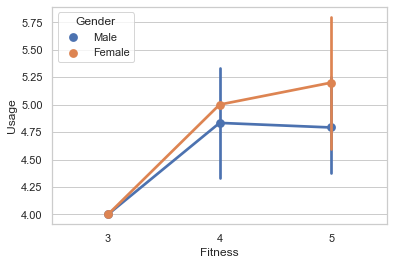

In [478]:
sns.pointplot(x = "Fitness", y = "Usage", data = data_798, hue = "Gender")

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

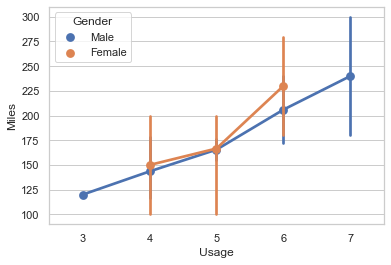

In [479]:
sns.pointplot(x = "Usage", y = "Miles", data = data_798, hue = "Gender")

<AxesSubplot:xlabel='Usage', ylabel='Miles'>

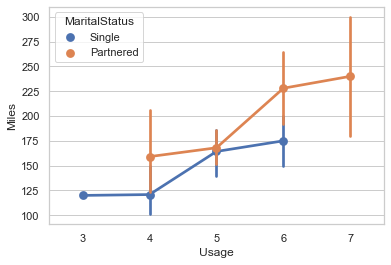

In [480]:
sns.pointplot(x = "Usage", y = "Miles", data = data_798, hue = "MaritalStatus")

These plots show that women have a slight higher usage than men, but it might be because of less data points at certain fitness levels.

## Scatterplot

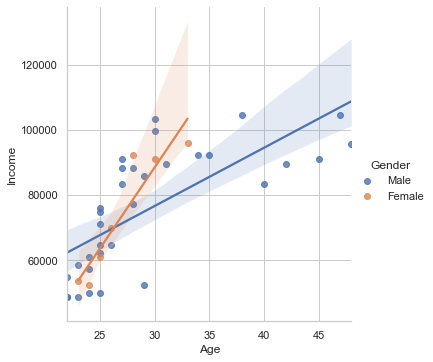

In [481]:
sns.lmplot(x = "Age", y = "Income", data = data_798, hue = "Gender")

## Swarmplot

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

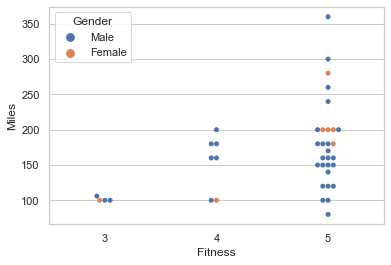

In [482]:
sns.swarmplot(x = "Fitness", y = "Miles", data = data_798, hue = "Gender")

This shows taht Most points are at fitness level 5 and they have a large swath of miles.

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

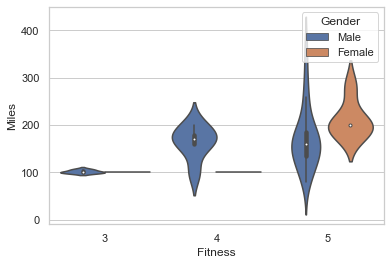

In [483]:
sns.violinplot(x = "Fitness", y = "Miles", data = data_798, hue = "Gender")

## Barplot

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

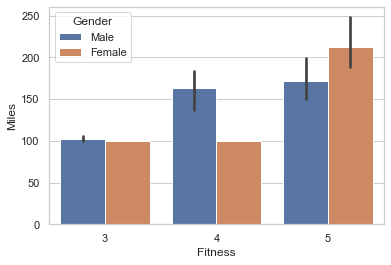

In [484]:
sns.barplot(x = "Fitness", y = "Miles", data = data_798, hue = "Gender")

<AxesSubplot:xlabel='Usage', ylabel='Fitness'>

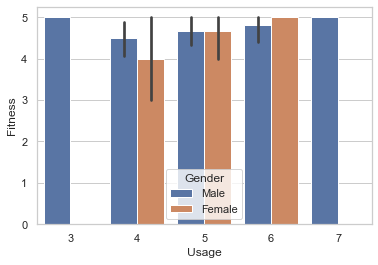

In [485]:
sns.barplot(x = "Usage", y = "Fitness", data = data_798, hue = "Gender")

This seems to show that these users are alot more fit on average.

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

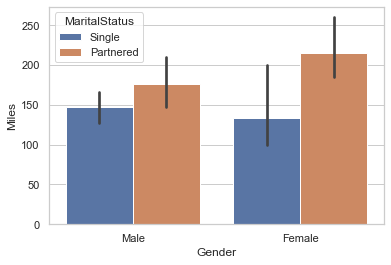

In [486]:
sns.barplot(x = "Gender", y = "Miles", data = data_798, hue = "MaritalStatus")

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

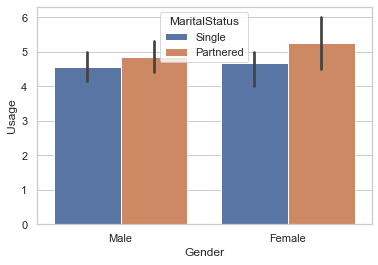

In [487]:
sns.barplot(x = "Gender", y = "Usage", data = data_798, hue = "MaritalStatus")

## Univariate Distribution Plots

<AxesSubplot:xlabel='Age', ylabel='Density'>

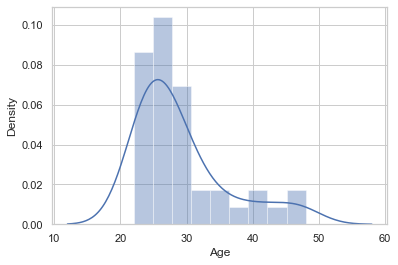

In [488]:
sns.distplot(data_798.Age)

In [489]:
group798 = data_798.groupby("MaritalStatus")

print(group798.mean())
print(data_798["Age"].mean())
print(data_798["Age"].median())

                     Age  Education     Usage   Fitness        Income  \
MaritalStatus                                                           
Partnered      29.826087  17.434783  4.913043  4.695652  82047.173913   
Single         28.117647  17.176471  4.588235  4.529412  66504.588235   

                    Miles  
MaritalStatus              
Partnered      183.043478  
Single         145.058824  
29.1
27.0


The plot is Right Skewed with mean age being 29 and median age being 27.

<AxesSubplot:xlabel='Miles', ylabel='Density'>

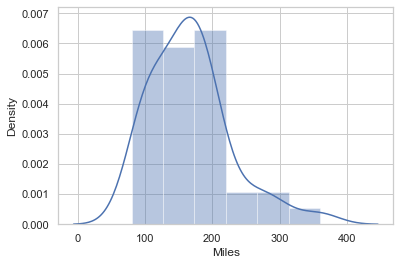

In [490]:
sns.distplot(data_798.Miles)

<AxesSubplot:xlabel='Income', ylabel='Density'>

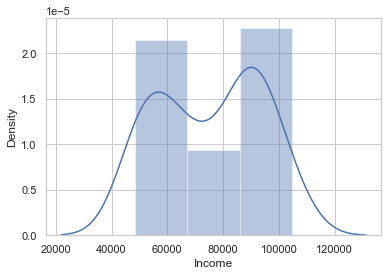

In [491]:
sns.distplot(data_798.Income)

82047.173913   
66504.588235 

The average Income for partnered people are 82,047 dollars and the average income for single people are 66,504 dollars annualy. This shows that of the other products, this is used most by higher earning people.

## Summary

The customer analysis for this product is by far the most different from the other 2 in the sense that this product is used more by fitter people and higher earning people. Interestingly, they also have the higher average for miles ridden by females. This could be because of the compartive lack of data points. In total, the product should be advertised more as a high intensity work out meant for experienced gym goers.